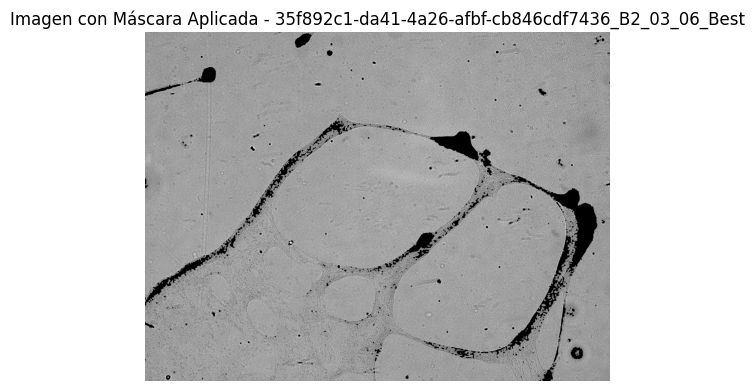

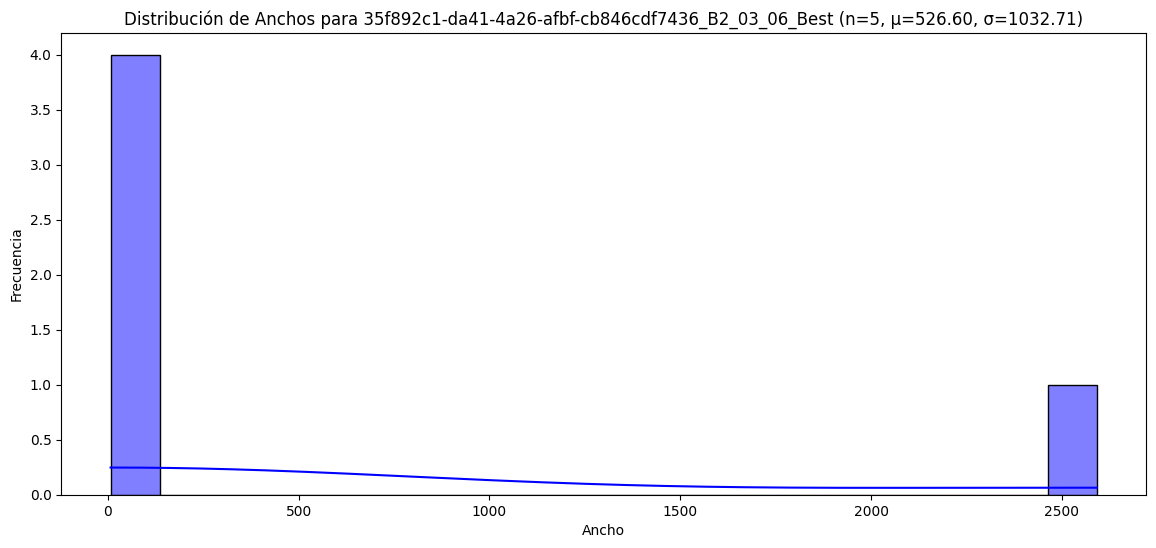

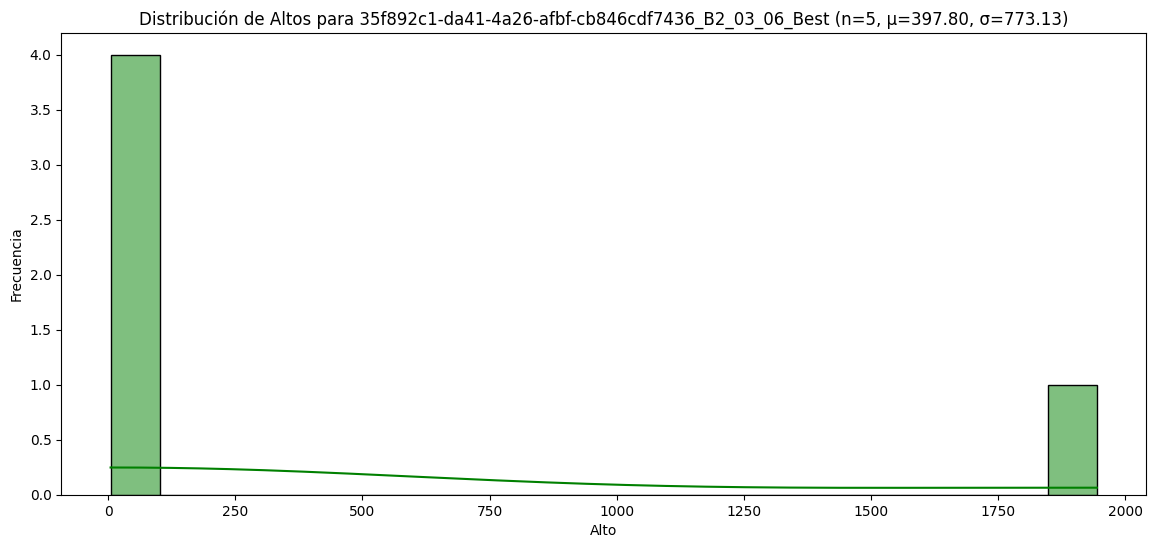

No se encontró el archivo de máscara: resultados/.ipynb_checkpoints/5_dilated_mask.png


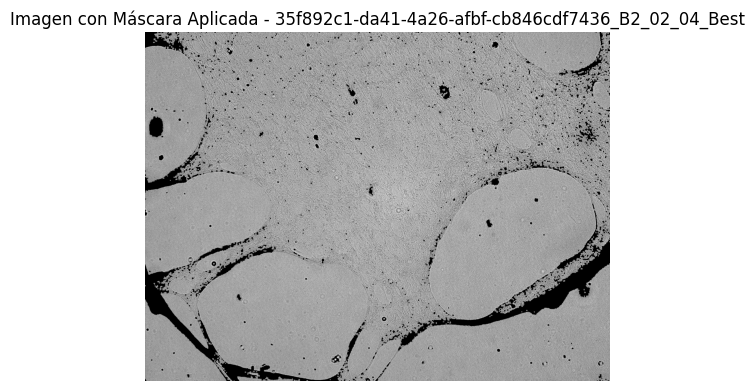

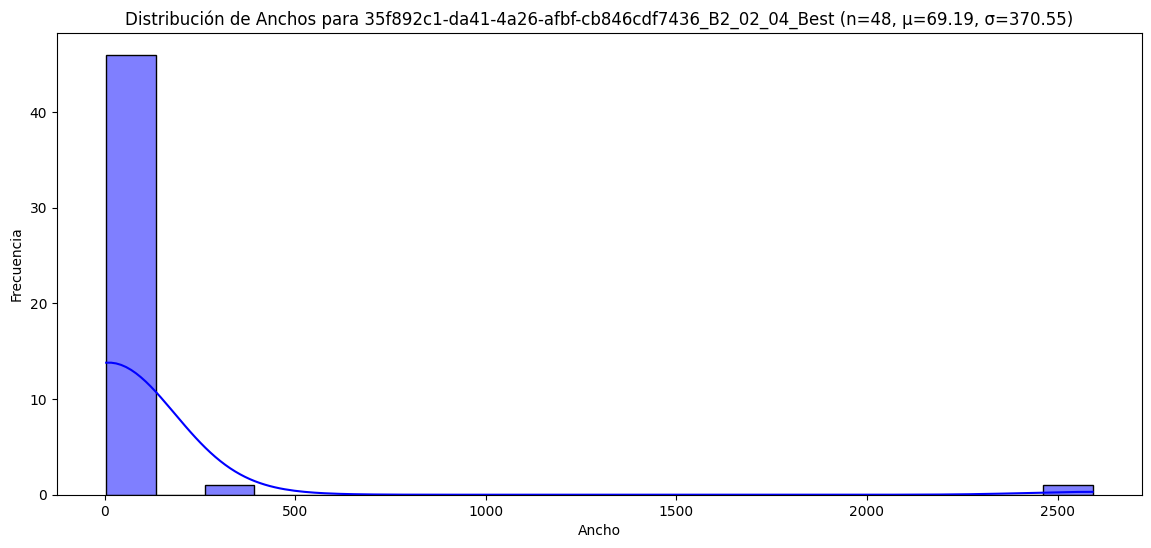

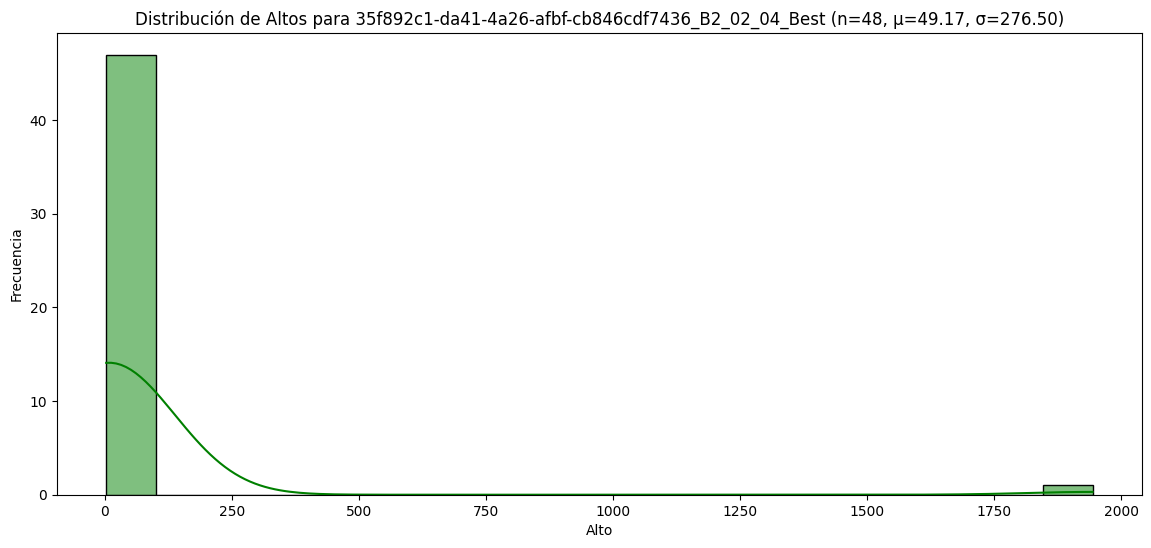

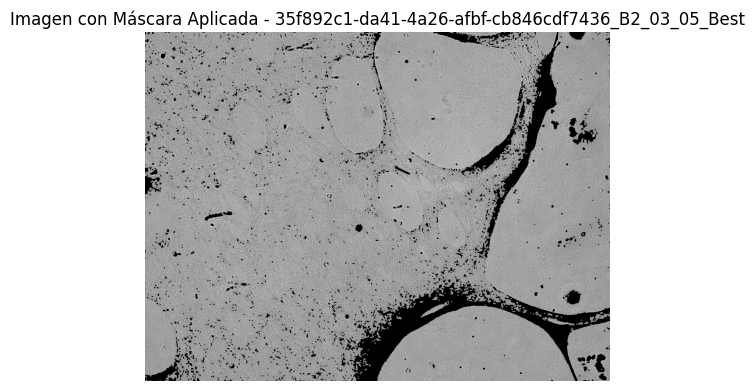

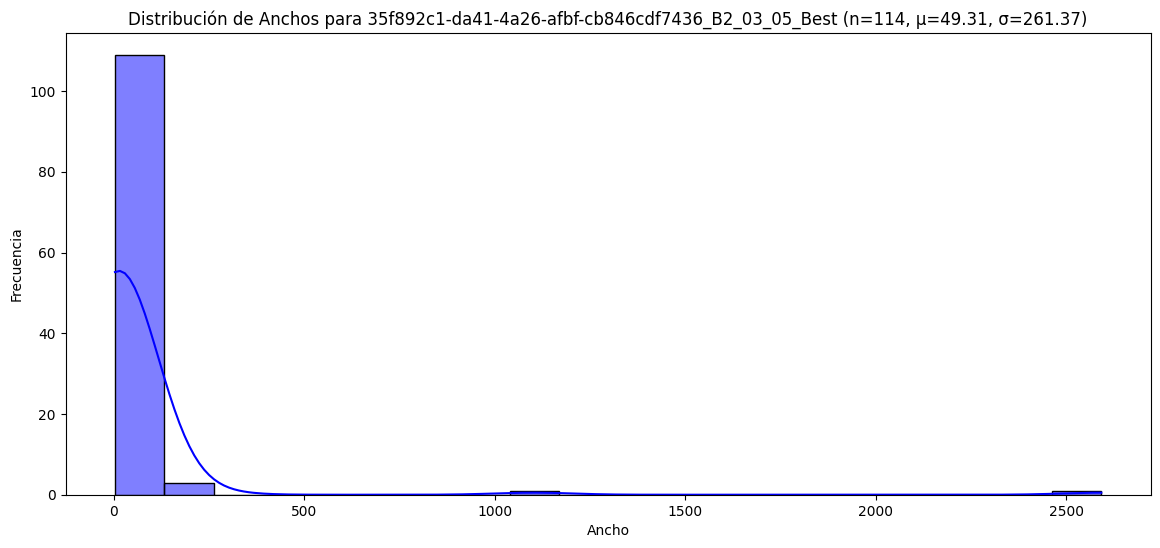

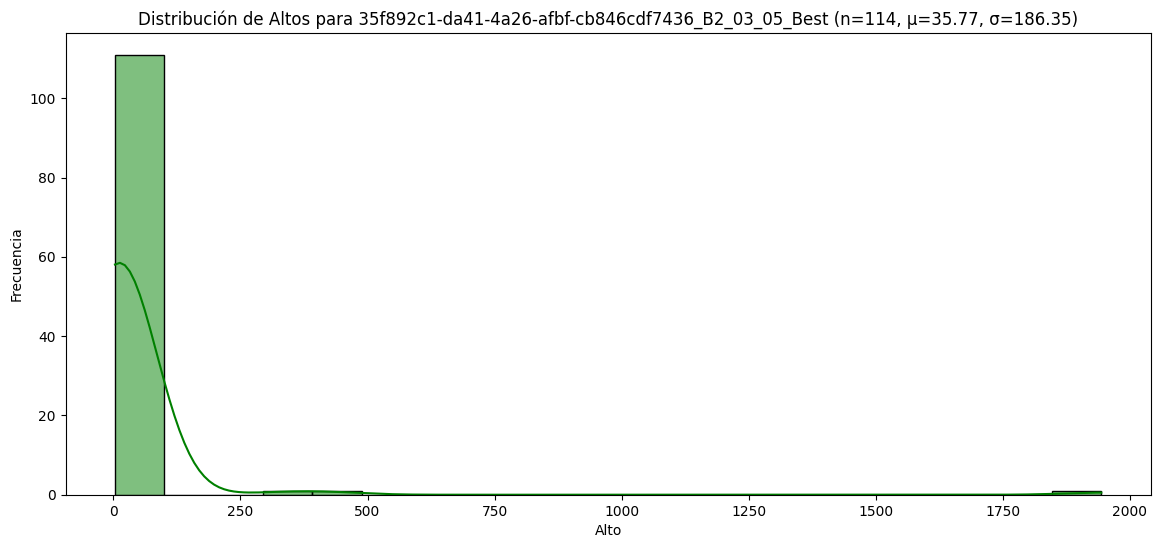

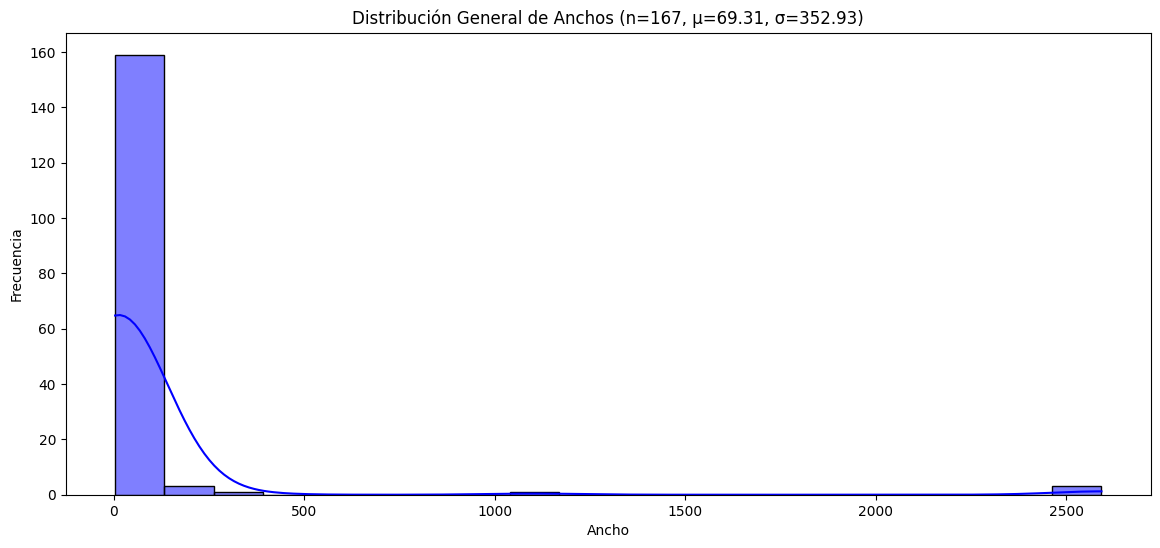

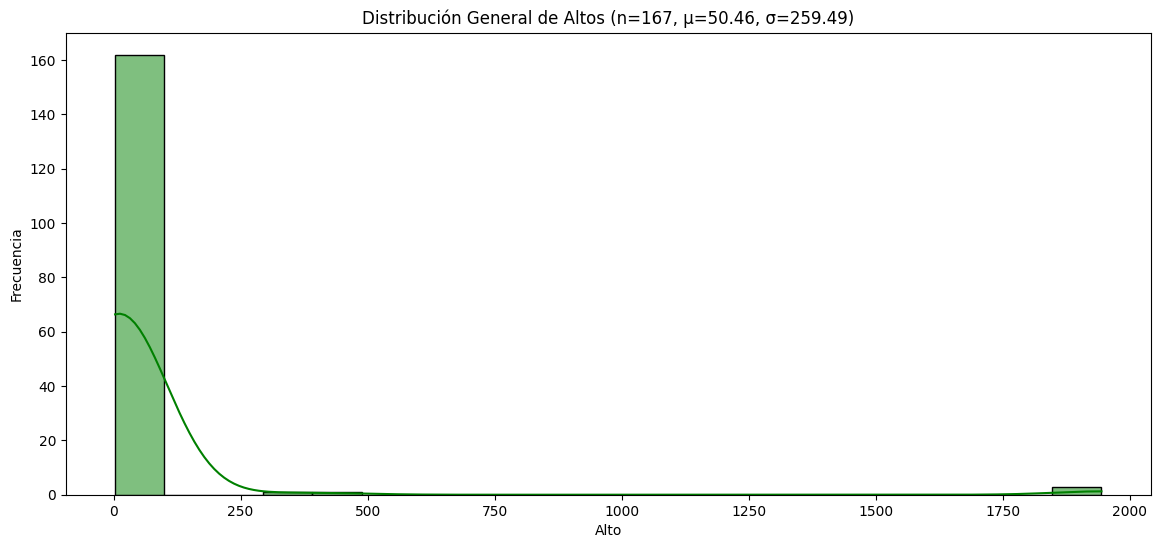

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy.stats import norm
import re

# Directorio donde están los resultados del Código
resultados_dir = 'resultados/'

# Lista de subdirectorios (uno por imagen procesada)
subdirs = [d for d in os.listdir(resultados_dir) if os.path.isdir(os.path.join(resultados_dir, d))]

# Inicializar listas para almacenar anchos y altos de todos los objetos
all_widths = []
all_heights = []

for subdir in subdirs:
    subdir_path = os.path.join(resultados_dir, subdir)

    # Ruta de la máscara refinada (ajusta el nombre del archivo si es necesario)
    mask_filename = '5_dilated_mask.png'  # Usando la máscara dilatada del Código B
    mask_path = os.path.join(subdir_path, mask_filename)

    # Verificar si el archivo de máscara existe
    if not os.path.exists(mask_path):
        print(f"No se encontró el archivo de máscara: {mask_path}")
        continue

    # Cargar la máscara refinada
    refined_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Ruta de la imagen original correspondiente
    original_image_name = subdir + os.path.splitext(mask_filename)[1]  # Asumiendo mismo nombre y extensión
    original_image_path = os.path.join('/content/imagenes', original_image_name)

    if not os.path.exists(original_image_path):
        print(f"No se encontró la imagen original: {original_image_path}")
        continue

    # Cargar la imagen original en escala de grises
    original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)

    # Aplicar la máscara a la imagen original
    masked_image = cv2.bitwise_and(original_image, original_image, mask=refined_mask)

    # Mostrar la imagen con la máscara aplicada
    plt.figure(figsize=(6, 6))
    plt.title(f"Imagen con Máscara Aplicada - {subdir}")
    plt.imshow(masked_image, cmap='gray')
    plt.axis('off')
    plt.show()

    # Analizar contornos
    contours, _ = cv2.findContours(refined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Extraer anchos y altos
    widths = []
    heights = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        widths.append(w)
        heights.append(h)

    # Agregar a las listas generales
    all_widths.extend(widths)
    all_heights.extend(heights)

    # Tamaño de la muestra
    sample_size = len(widths)

    # Mostrar distribución de anchos para esta imagen
    if sample_size > 0:
        plt.figure(figsize=(14, 6))
        sns.histplot(widths, kde=True, bins=20, color="blue")
        mu_width, std_width = norm.fit(widths)
        plt.title(f'Distribución de Anchos para {subdir} (n={sample_size}, μ={mu_width:.2f}, σ={std_width:.2f})')
        plt.xlabel('Ancho')
        plt.ylabel('Frecuencia')
        plt.show()

    # Mostrar distribución de altos para esta imagen
    if sample_size > 0:
        plt.figure(figsize=(14, 6))
        sns.histplot(heights, kde=True, bins=20, color="green")
        mu_height, std_height = norm.fit(heights)
        plt.title(f'Distribución de Altos para {subdir} (n={sample_size}, μ={mu_height:.2f}, σ={std_height:.2f})')
        plt.xlabel('Alto')
        plt.ylabel('Frecuencia')
        plt.show()

    # Guardar resultados
    result_folder = os.path.join('analisis_resultados', subdir)
    os.makedirs(result_folder, exist_ok=True)
    cv2.imwrite(os.path.join(result_folder, 'mascara_refinada.png'), refined_mask)
    cv2.imwrite(os.path.join(result_folder, 'imagen_mascara_aplicada.png'), masked_image)

# Después de procesar todas las imágenes, mostrar distribuciones generales
total_samples = len(all_widths)

if total_samples > 0:
    # Distribución general de anchos
    plt.figure(figsize=(14, 6))
    sns.histplot(all_widths, kde=True, bins=20, color="blue")
    mu_width, std_width = norm.fit(all_widths)
    plt.title(f'Distribución General de Anchos (n={total_samples}, μ={mu_width:.2f}, σ={std_width:.2f})')
    plt.xlabel('Ancho')
    plt.ylabel('Frecuencia')
    plt.show()

    # Distribución general de altos
    plt.figure(figsize=(14, 6))
    sns.histplot(all_heights, kde=True, bins=20, color="green")
    mu_height, std_height = norm.fit(all_heights)
    plt.title(f'Distribución General de Altos (n={total_samples}, μ={mu_height:.2f}, σ={std_height:.2f})')
    plt.xlabel('Alto')
    plt.ylabel('Frecuencia')
    plt.show()
else:
    print("No se encontraron objetos para analizar.")
